# Titanic dataset - Binary classification

### Pycaret test

Mainly following the pycaret documentation [example](https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb)

The Titanic dataset present a binary classification problem, where the goal is to predict whether a passenger survived or not.   
In this notebook, I will build a simple Random Forest model to predict the survival of passengers.

Will import the data cleaned in the previous step, with the following features:

| Variable | Definition                          | Value                        |
|----------|-------------------------------------|----------------------------|
| survival | Survival                            | 0=No, 1=Yes            |
| pclass   | Ticket class                        | 1=1st, 2=2nd, 3=3rd  |
| sex      | Sex                                 | 0=Female, 1=Male                           |
| Age      | Age in years                        |                            |
| sibsp    | # of siblings / spouses aboard the Titanic |                    |
| parch    | # of parents / children aboard the Titanic |                    |
| fare     | Passenger fare                      |                            |
| cabin    | Cabin number                        | 0=NaN/Unidentified, 1=Yes/Valid Cabin nr                           |
| embarked | Port of Embarkation                 | 0=Cherbourg, 1=Queenstown, 2=Southampton |

In [1]:
%reload_ext watermark
%watermark

Last updated: 2024-05-28T20:07:12.438317+02:00

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.24.0

Compiler    : MSC v.1935 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

pd.set_option('display.float_format', lambda x: '%.2f' % x)
%watermark -w
%watermark -iv

Watermark: 2.4.3

numpy     : 1.26.4
pycaret   : 3.3.2
matplotlib: 3.7.5
seaborn   : 0.13.2
pandas    : 2.1.4



## Load and inspect data

In [3]:
# load cleaned data
train_data = pd.read_csv('data/train_clean_allFeatures.csv')
test_data = pd.read_csv('data/test_clean_allFeatures.csv')

# print the shape of the data
print('Train dataset shape (rows, columns):', train_data.shape)
print('Test dataset shape (rows, columns):', test_data.shape)

train_data.head(3)

Train dataset shape (rows, columns): (891, 12)
Test dataset shape (rows, columns): (418, 11)


,PassengerId,Survived,Age,Fare,SibSp,Parch,Pclass_2,Pclass_3,Sex_1,Cabin_1,Embarked_1,Embarked_2
0,1,0,-0.58,-0.50,0.48,-0.44,False,True,True,False,False,True
1,2,1,0.66,0.73,0.48,-0.44,False,False,False,True,False,False
2,3,1,-0.27,-0.49,-0.48,-0.44,False,True,False,False,False,True


In [4]:
# test_data.head(3)

## Pycaret setup

Will use the Pycaret library to quickly compare different models and tune hyperparameters.   
Pycaret is a low-code machine learning library that automates the machine learning workflow. It is an open-source project that is built on top of popular machine learning libraries, including scikit-learn, XGBoost, and LightGBM.

In [5]:
# train_data minus 'PassengerId' and low-importance features
train_data = train_data.drop(['PassengerId', 'Parch', 'Embarked_1', 'Pclass_2'], axis=1)
train_data.head(3)

,Survived,Age,Fare,SibSp,Pclass_3,Sex_1,Cabin_1,Embarked_2
0,0,-0.58,-0.50,0.48,True,True,False,True
1,1,0.66,0.73,0.48,False,False,True,False
2,1,-0.27,-0.49,-0.48,True,False,False,True


In [6]:
# import pycaret classification and init setup
from pycaret.classification import *

# setup the environment
s = setup(data=train_data, target='Survived', session_id=123)

# s = setup(data=train_data, target='Survived', session_id=123, silent=True, 
#           train_size=0.8, normalize=True, transformation=True, fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 8)"
4,Transformed data shape,"(891, 8)"
5,Transformed train set shape,"(623, 8)"
6,Transformed test set shape,"(268, 8)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [91]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [93]:
# init setup on exp
exp.setup(data=train_data, target='Survived', session_id=123)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 8)"
4,Transformed data shape,"(891, 8)"
5,Transformed train set shape,"(623, 8)"
6,Transformed test set shape,"(268, 8)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


## Compare models
This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using ``add_metric`` and ``remove_metric`` function.

In [94]:
# compare baseline models
best = compare_models()
# exp.compare_models() # compare models using OOP

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8250,0.8439,0.7279,0.7980,0.7590,0.6225,0.6262,0.0300
lightgbm,Light Gradient Boosting Machine,0.8202,0.8423,0.7362,0.7862,0.7565,0.6147,0.6191,0.0980
rf,Random Forest Classifier,0.8169,0.8454,0.7236,0.7846,0.7502,0.6065,0.6101,0.0590
ada,Ada Boost Classifier,0.8105,0.8439,0.7533,0.7551,0.7524,0.5991,0.6010,0.0240
xgboost,Extreme Gradient Boosting,0.8091,0.8373,0.7154,0.7682,0.7378,0.5887,0.5921,0.0290
lda,Linear Discriminant Analysis,0.8088,0.8608,0.7281,0.7642,0.7429,0.5913,0.5944,0.0140
lr,Logistic Regression,0.8071,0.8624,0.7239,0.7642,0.7395,0.5873,0.5914,0.5040
ridge,Ridge Classifier,0.8056,0.8610,0.7197,0.7610,0.7364,0.5833,0.5868,0.0090
qda,Quadratic Discriminant Analysis,0.7977,0.8487,0.7196,0.7528,0.7296,0.5691,0.5754,0.0070
et,Extra Trees Classifier,0.7944,0.8317,0.7067,0.7478,0.7250,0.5611,0.5632,0.0530


## Analyze model

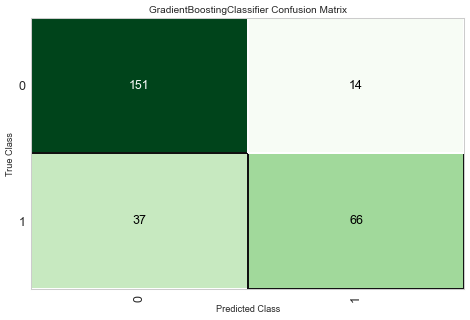

In [95]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix', scale=0.6)

``pycaret.classification.plot_model()``  
See more available plot options from [documentation](https://pycaret.readthedocs.io/en/stable/api/classification.html#pycaret.classification.plot_model)   
E.g. `pipeline`, `auc`, `confusion_matrix`, `parameter`, `pr`, `threshold`,  `boundary`

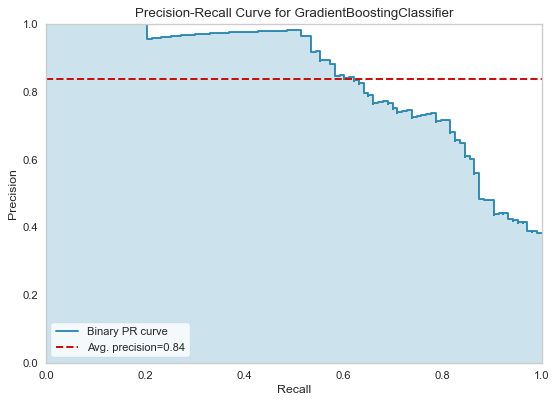

In [96]:
# plot AUC
plot_model(best, plot = 'pr', scale=0.8)

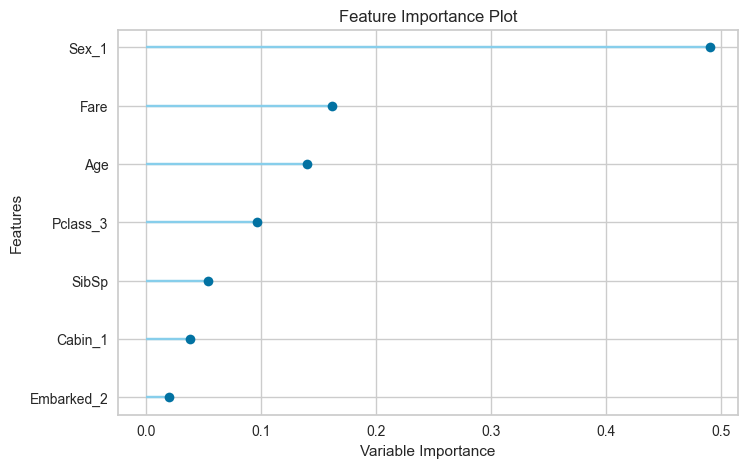

In [97]:
# plot feature importance
plot_model(best, plot = 'feature')

An alternate to plot_model function is ``evaluate_model``. It is interactive with many plots, BUT can only be used in Notebook since it uses ipywidget.

In [98]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Tune best model

In [99]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8681,0.7917,0.8261,0.8085,0.6947,0.6951
1,0.8571,0.7997,0.7917,0.8261,0.8085,0.6947,0.6951
2,0.7937,0.9338,0.6250,0.7895,0.6977,0.5442,0.5528
3,0.8387,0.8829,0.6957,0.8421,0.7619,0.6416,0.6483
4,0.7258,0.7018,0.5417,0.6842,0.6047,0.3991,0.4055
5,0.8065,0.8158,0.6667,0.8000,0.7273,0.5792,0.5850
6,0.9032,0.8739,0.8333,0.9091,0.8696,0.7929,0.7948
7,0.8548,0.8311,0.8333,0.8000,0.8163,0.6964,0.6968
8,0.7903,0.8459,0.6667,0.7619,0.7111,0.5477,0.5507


In [100]:
# tuned_dt = tune_model(gbc, optimize = 'Accuracy')
tuned_gbc = tune_model(gbc, n_iter=50, optimize = 'Accuracy', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8371,0.7917,0.7917,0.7917,0.6635,0.6635
1,0.8571,0.8387,0.7917,0.8261,0.8085,0.6947,0.6951
2,0.8254,0.8921,0.6667,0.8421,0.7442,0.6144,0.6240
3,0.8548,0.8941,0.6957,0.8889,0.7805,0.6744,0.6858
4,0.7419,0.7325,0.5417,0.7222,0.6190,0.4299,0.4401
5,0.8226,0.8399,0.6667,0.8421,0.7442,0.6112,0.6209
6,0.8871,0.8871,0.7917,0.9048,0.8444,0.7565,0.7606
7,0.8387,0.8333,0.8333,0.7692,0.8000,0.6652,0.6667
8,0.8226,0.8629,0.7083,0.8095,0.7556,0.6173,0.6207


Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [101]:
# use automl function to tune hyperparameters
tuned_best_accuracy = automl(optimize = 'Accuracy')
# tuned_best_auc = automl(optimize = 'AUC')
# tuned_best_precision = automl(optimize = 'Precision')
tuned_best_accuracy

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='log_loss', max_depth=9,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.2, min_samples_leaf=4,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=260, n_iter_no_change=None,
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

,Samples,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC,Selection Rate
Sex_1,,,,,,,,,
False,93.00,0.83,0.81,0.85,0.90,0.88,0.60,0.60,0.67
True,175.00,0.80,0.61,0.27,0.56,0.36,0.26,0.29,0.10


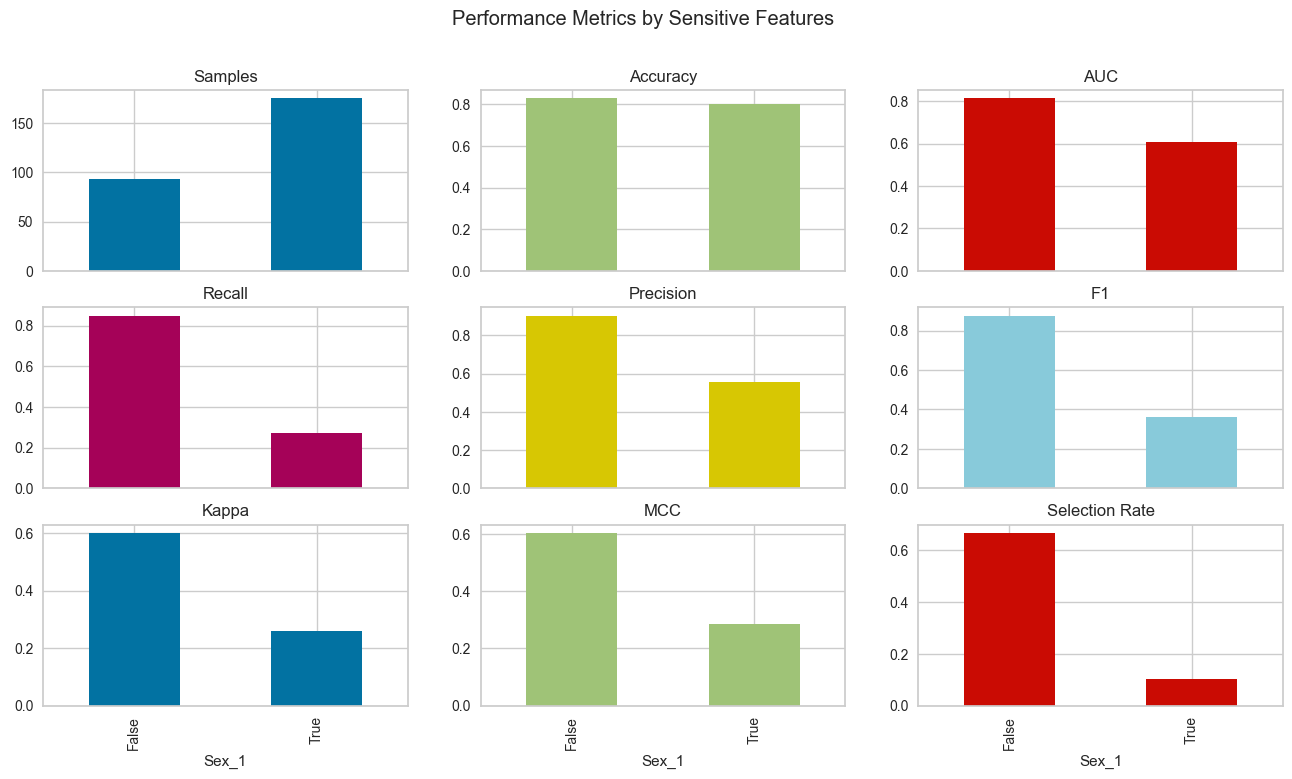

In [102]:
# check fairness
check_fairness(best, sensitive_features='Sex_1')

In [103]:
# dashboard function
# dashboard(dt, display_format ='inline')

## Ensemble model

``pycaret.classification.ensemble_model()``

In [104]:
best_accuracy_models_top3 = compare_models(sort = 'Accuracy', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8250,0.8439,0.7279,0.7980,0.7590,0.6225,0.6262,0.0280
lightgbm,Light Gradient Boosting Machine,0.8202,0.8423,0.7362,0.7862,0.7565,0.6147,0.6191,0.0960
rf,Random Forest Classifier,0.8169,0.8454,0.7236,0.7846,0.7502,0.6065,0.6101,0.0490
ada,Ada Boost Classifier,0.8105,0.8439,0.7533,0.7551,0.7524,0.5991,0.6010,0.0240
xgboost,Extreme Gradient Boosting,0.8091,0.8373,0.7154,0.7682,0.7378,0.5887,0.5921,0.0190
lda,Linear Discriminant Analysis,0.8088,0.8608,0.7281,0.7642,0.7429,0.5913,0.5944,0.0070
lr,Logistic Regression,0.8071,0.8624,0.7239,0.7642,0.7395,0.5873,0.5914,0.0100
ridge,Ridge Classifier,0.8056,0.8610,0.7197,0.7610,0.7364,0.5833,0.5868,0.0070
qda,Quadratic Discriminant Analysis,0.7977,0.8487,0.7196,0.7528,0.7296,0.5691,0.5754,0.0070
et,Extra Trees Classifier,0.7944,0.8317,0.7067,0.7478,0.7250,0.5611,0.5632,0.0450


In [105]:
# top 3 models based on recall
best_accuracy_models_top3

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lamb

## Blend Models
This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the ``get_metrics`` function. Custom metrics can be added or removed using ``add_metric`` and ``remove_metric`` function.

In [106]:
# blend top 3 models
blended_model = blend_models(best_accuracy_models_top3)
blended_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8691,0.7917,0.7600,0.7755,0.6328,0.6331
1,0.8571,0.8291,0.7917,0.8261,0.8085,0.6947,0.6951
2,0.7937,0.9177,0.6250,0.7895,0.6977,0.5442,0.5528
3,0.8226,0.9130,0.6522,0.8333,0.7317,0.6021,0.6122
4,0.7419,0.7039,0.5417,0.7222,0.6190,0.4299,0.4401
5,0.8387,0.8399,0.7083,0.8500,0.7727,0.6493,0.6558
6,0.8871,0.8794,0.8333,0.8696,0.8511,0.7602,0.7607
7,0.8065,0.8202,0.8333,0.7143,0.7692,0.6043,0.6096
8,0.8226,0.8509,0.7500,0.7826,0.7660,0.6232,0.6236


VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=Non...
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=False,
                                                     random_state=123,
                                                     verbose=0,
                                                     warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [114]:
# tune the blended model
tuned_blend = tune_model(blended_model, optimize = 'Accuracy')
tuned_blend

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8584,0.7917,0.7600,0.7755,0.6328,0.6331
1,0.8571,0.8387,0.7917,0.8261,0.8085,0.6947,0.6951
2,0.8254,0.8985,0.6250,0.8824,0.7317,0.6078,0.6277
3,0.8387,0.9075,0.6957,0.8421,0.7619,0.6416,0.6483
4,0.7419,0.6930,0.5417,0.7222,0.6190,0.4299,0.4401
5,0.8226,0.8476,0.6667,0.8421,0.7442,0.6112,0.6209
6,0.8871,0.8794,0.8333,0.8696,0.8511,0.7602,0.7607
7,0.8065,0.8235,0.8333,0.7143,0.7692,0.6043,0.6096
8,0.8226,0.8553,0.7500,0.7826,0.7660,0.6232,0.6236


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='log_loss',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=Non...
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=False,
                                                     random_state=123,
                                                     verbose=0,
                                                     warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft',
                 weights=[0.2, 0.8200000000000001, 0.41000000000000003])

## Stack Models
This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the ``get_metrics`` function. Custom metrics can be added or removed using ``add_metric`` and ``remove_metric`` function.

In [108]:
# stack models
stacked_model = stack_models(best_accuracy_models_top3)
stacked_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8691,0.7917,0.7600,0.7755,0.6328,0.6331
1,0.8571,0.7981,0.7917,0.8261,0.8085,0.6947,0.6951
2,0.8095,0.9199,0.6250,0.8333,0.7143,0.5758,0.5892
3,0.8387,0.9052,0.6522,0.8824,0.7500,0.6349,0.6507
4,0.7419,0.7072,0.5417,0.7222,0.6190,0.4299,0.4401
5,0.8065,0.8366,0.6250,0.8333,0.7143,0.5724,0.5860
6,0.8871,0.8750,0.7917,0.9048,0.8444,0.7565,0.7606
7,0.8387,0.8213,0.8333,0.7692,0.8000,0.6652,0.6667
8,0.8065,0.8564,0.7083,0.7727,0.7391,0.5857,0.5871


StackingClassifier(cv=5,
                   estimators=[('Gradient Boosting Classifier',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='log_loss',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_estimators=100,
                                                           n_iter_no_cha...
                                                       random_state=123,
                                                       verbose=0,
                                                       warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

In [109]:
# tune the blended model
tuned_stack = tune_model(stacked_model, optimize = 'Accuracy')
tuned_stack

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8681,0.7917,0.7600,0.7755,0.6328,0.6331
1,0.8571,0.8205,0.7917,0.8261,0.8085,0.6947,0.6951
2,0.8095,0.9167,0.5833,0.8750,0.7000,0.5685,0.5936
3,0.8548,0.9142,0.6522,0.9375,0.7692,0.6683,0.6917
4,0.7419,0.7039,0.5417,0.7222,0.6190,0.4299,0.4401
5,0.8065,0.8410,0.6250,0.8333,0.7143,0.5724,0.5860
6,0.8871,0.8783,0.7917,0.9048,0.8444,0.7565,0.7606
7,0.8710,0.8224,0.8333,0.8333,0.8333,0.7281,0.7281
8,0.8226,0.8520,0.7083,0.8095,0.7556,0.6173,0.6207


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


StackingClassifier(cv=5,
                   estimators=[('Gradient Boosting Classifier',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='log_loss',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_estimators=100,
                                                           n_iter_no_cha...
                                                       random_state=123,
                                                       verbose=0,
                                                       warm_start=False))],
                   final_estimator=LogisticRegression(C=0.056, class_weight={},
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

## Prediction on test data

In [111]:
# predict on test data
predictions_gbc = predict_model(tuned_gbc, data=test_data)
predictions_blend3_gbc_lgbm_rf = predict_model(tuned_blend, data=test_data)
predictions_stack3_gbc_lgbm_rf = predict_model(tuned_stack, data=test_data)
predictions_gbc.head(3)

,PassengerId,Age,Fare,SibSp,Parch,Pclass_2,Pclass_3,Sex_1,Cabin_1,Embarked_1,Embarked_2,prediction_label,prediction_score
0,892,0.39,-0.49,-0.48,-0.44,False,True,True,False,True,False,0,0.94
1,893,1.36,-0.51,0.48,-0.44,False,True,False,False,False,True,0,0.89
2,894,2.52,-0.46,-0.48,-0.44,True,False,True,False,True,False,0,0.79


In [112]:
# structure the Kaggle submission files

# gradient boosting classifier
submission_gbc = predictions_gbc[['PassengerId', 'prediction_label']]
submission_gbc.columns = ['PassengerId', 'Survived']

# blend3 model of gradient boosting classifier, lightgbm and random forest
submission_blend3_gbc_lgbm_rf = predictions_blend3_gbc_lgbm_rf[['PassengerId', 'prediction_label']]
submission_blend3_gbc_lgbm_rf.columns = ['PassengerId', 'Survived']

# stack3 model of gradient boosting classifier, lightgbm and random forest
submission_stack3_gbc_lgbm_rf = predictions_stack3_gbc_lgbm_rf[['PassengerId', 'prediction_label']]
submission_stack3_gbc_lgbm_rf.columns = ['PassengerId', 'Survived']

submission_gbc.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [113]:
# save the submission files
submission_gbc.to_csv('submissions/gbc.csv', index=False)
submission_blend3_gbc_lgbm_rf.to_csv('submissions/blend3_gbc_lgbm_rf.csv', index=False)
submission_stack3_gbc_lgbm_rf.to_csv('submissions/stack3_gbc_lgbm_rf.csv', index=False)

### Tuned Model Performance

| Model                           | Accuracy | Accuracy_tuned |  Accuracy Kaggle test_set | 
|---------------------------------|----------|----------------|-----------|
| Gradient Boosting Classifier    | 82.5     | 83.5           | 76.6    |
| 3x blend (gbm, lgbm, rf)        | 82.3     | 82.8           | 75.8    |
| 3x stack (gbm, lgbm, rf)        | 82.5     | 83.2           | 77.0    |
